
Introduction

The relationship between height and weight is a fundamental aspect of human biology and health. Understanding how these two variables correlate can provide insights into various aspects of health, including growth patterns, nutritional status, and the risk of developing certain health conditions. This project aims to analyze the relationship between height and weight using statistical and machine learning techniques to develop predictive models. These models can estimate weight based on height, providing valuable tools for health professionals and researchers.


Real-World Implementation

In real-world scenarios, understanding the height-weight relationship is crucial for several domains:

Healthcare: Physicians use height and weight measurements to calculate Body Mass Index (BMI), which is a key indicator of obesity and undernutrition. Accurate prediction models can help in assessing growth in children, diagnosing health conditions, and tailoring personalized healthcare plans.

Nutrition: Dietitians use height and weight to develop individualized diet plans. Predictive models can aid in recommending caloric intake and nutritional requirements based on an individual's height.

Fitness and Wellness: Fitness professionals utilize height and weight data to create customized fitness programs. Predictive tools can enhance these programs by providing more precise assessments of an individual's health and fitness needs.

Domain Application

The applications of height and weight analysis span multiple domains:

Public Health: Identifying trends in population health, such as the prevalence of obesity or undernutrition, and developing interventions to address these issues.
Sports Science: Tailoring training programs and nutrition plans for athletes to optimize performance and health.
Pediatrics: Monitoring children's growth to ensure they are developing normally and identifying any potential health concerns early.

Conclusion

By analyzing the relationship between height and weight, this project aims to develop accurate predictive models that can be applied in various domains such as healthcare, nutrition, and public health. Utilizing powerful tools and libraries, the project will provide valuable insights and practical solutions to enhance health assessments and interventions.

In [1]:
import os 
os.getcwd()#my current path

'c:\\Users\\A3MAX SOFTWARE TECH\\A VS CODE\\11. CAPSTONE PROJECT_DEPLOYMENT\\HEIGHT & WEIGHT'

In [2]:
os.chdir(r'C:\Users\A3MAX SOFTWARE TECH\A VS CODE\11. CAPSTONE PROJECT_DEPLOYMENT\HEIGHT & WEIGHT') #changing path

In [3]:
#importing eda libraries
import numpy as np  #math
import pandas as pd #excellent for data manuplation

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing 
from sklearn.preprocessing import StandardScaler

#spliting the data
from sklearn.model_selection import train_test_split

# importing Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#evalution matrics
from sklearn.metrics import mean_squared_error

In [4]:
df=pd.read_csv('SOCR-HeightWeight.csv') #reading csv file

In [5]:
df.head() #1 pound=453grams

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [6]:
#converting weight pounds to kg
df['Weight_kg']=df['Weight(Pounds)']*0.453592  

# Convert inches to the desired format (feet.inches) 
df['Height(Feet.Inches)'] = df['Height(Inches)'] // 12 + (df['Height(Inches)'] % 12) / 10

In [7]:
df.describe()

,Index,Height(Inches),Weight(Pounds),Weight_kg,Height(Feet.Inches)
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421,57.642209,5.795967
std,7217.022701,1.901679,11.660898,5.289290,0.183513
min,1.000000,60.278360,78.014760,35.386871,5.027836
25%,6250.750000,66.704397,119.308675,54.117461,5.670440
50%,12500.500000,67.995700,127.157750,57.677738,5.799570
75%,18750.250000,69.272958,134.892850,61.186318,5.927296
max,25000.000000,75.152800,170.924000,77.529759,6.315280


In [8]:
drop_col=['Index','Height(Inches)','Weight(Pounds)'] # selecting columns to del it

#droping columns
df=df.drop(columns=drop_col,axis=1)

In [9]:
df.sample(3) #it will give random row information

,Weight_kg,Height(Feet.Inches)
2074,71.650572,6.117130
21667,66.543126,5.855531
19849,51.609925,5.676526


In [10]:
df.shape  #checking shape of the data

(25000, 2)

In [11]:
df.isna().any() #checking null values

Weight_kg              False
Height(Feet.Inches)    False
dtype: bool

In [12]:
df.dtypes #checking dtypes for our dataframe

Weight_kg              float64
Height(Feet.Inches)    float64
dtype: object

In [13]:
df.corr() #correlation

,Weight_kg,Height(Feet.Inches)
Weight_kg,1.000000,0.499192
Height(Feet.Inches),0.499192,1.000000


In [14]:
df.describe()  

,Weight_kg,Height(Feet.Inches)
count,25000.000000,25000.000000
mean,57.642209,5.795967
std,5.289290,0.183513
min,35.386871,5.027836
25%,54.117461,5.670440
50%,57.677738,5.799570
75%,61.186318,5.927296
max,77.529759,6.315280


Mean:

The mean height is approximately 67.99 inches.
The mean weight is approximately 127.08 pounds.
Standard Deviation (Std):

The standard deviation for height is approximately 1.90 inches, indicating the spread or dispersion of heights around the mean.
The standard deviation for weight is approximately 11.66 pounds, indicating the spread or dispersion of weights around the mean.
Minimum and Maximum Values:

The minimum height recorded is approximately 60.28 inches, and the maximum height is approximately 75.15 inches.
The minimum weight recorded is approximately 78.01 pounds, and the maximum weight is approximately 170.92 pounds.
Percentiles (25th, 50th, and 75th):

The 25th percentile (Q1) indicates that 25% of the data falls below a height of approximately 66.70 inches and a weight of approximately 119.31 pounds.
The 50th percentile (median) indicates that 50% of the data falls below a height of approximately 67.99 inches and a weight of approximately 127.16 pounds.
The 75th percentile (Q3) indicates that 75% of the data falls below a height of approximately 69.27 inches and a weight of approximately 134.89 pounds.

### Checking outliers using boxplot

<Axes: xlabel='Height(Feet.Inches)'>

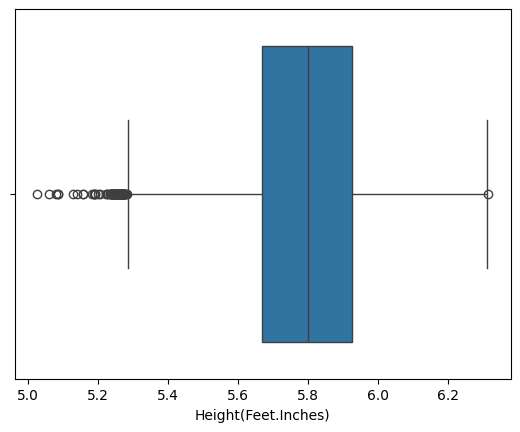

In [15]:
sns.boxplot(x=df['Height(Feet.Inches)'])

<Axes: xlabel='Weight_kg'>

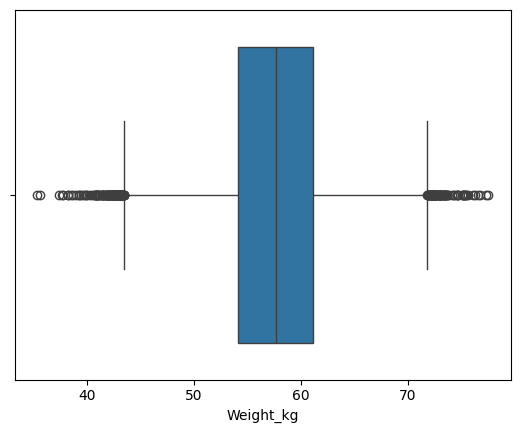

In [16]:
sns.boxplot(x=df['Weight_kg']) #checking outliers for 

A correlation coefficient of 0.502859 suggests a moderate positive correlation between height and weight

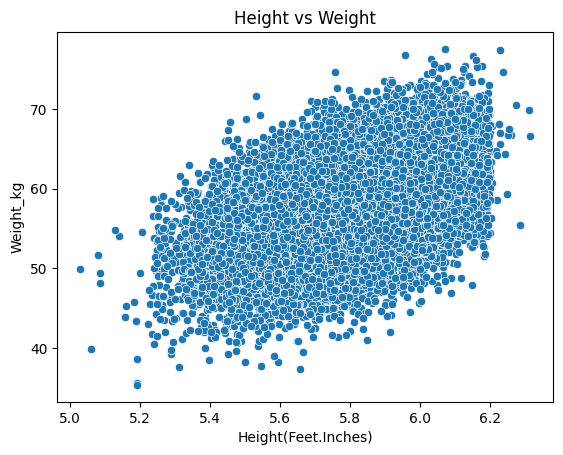

In [17]:
x=df['Height(Feet.Inches)']
y=df['Weight_kg']

sns.scatterplot(x=x,y=y)
plt.title('Height vs Weight')
plt.xlabel('Height(Feet.Inches)')
plt.ylabel('Weight_kg')
plt.show()

In [18]:
df.sample(3)

,Weight_kg,Height(Feet.Inches)
23666,50.915883,5.856413
20751,63.938102,5.990956
6937,57.193687,5.903379


In [19]:
# split the data into dependent & independent variable 
X=df.iloc[:,1]
y=df.iloc[:,0]

In [20]:
X

0        5.578331
1        6.151521
2        5.939874
3        5.821660
4        5.778781
           ...   
24995    5.950215
24996    5.454826
24997    5.469855
24998    5.752918
24999    5.887761
Name: Height(Feet.Inches), Length: 25000, dtype: float64

In [21]:
df.columns[1] #X variable column name

'Height(Feet.Inches)'

In [22]:
df.columns[0] # y variable

'Weight_kg'

In [23]:
#Data scaling(preprocessing data)

In [24]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X.values.reshape(-1,1))


scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

##### spliting data into 80% 20% radio

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
print('Shape of trining data')
print(X_train.shape)
print(y_train.shape)

print('Shpae of testing data')
print(X_test.shape)
print(y_test.shape)

Shape of trining data
(20000,)
(20000,)
Shpae of testing data
(5000,)
(5000,)


In [27]:
#linear regression model X should be 2d array so we are reshaping it to 2d array

# Reshape training data
X_train_2d = X_train.values.reshape(-1, 1)
y_train_2d = y_train.values.reshape(-1, 1)

# Reshape testing data
X_test_2d = X_test.values.reshape(-1, 1)
y_test_2d = y_test.values.reshape(-1, 1)

print("Shape of training data (X):", X_train_2d.shape)
print("Shape of training data (y):", y_train_2d.shape)
print("Shape of testing data (X):", X_test_2d.shape)
print("Shape of testing data (y):", y_test_2d.shape)

Shape of training data (X): (20000, 1)
Shape of training data (y): (20000, 1)
Shape of testing data (X): (5000, 1)
Shape of testing data (y): (5000, 1)


In [28]:
lr=LinearRegression() #linear Regression
lr

LinearRegression()

In [29]:
lr.fit(X_train_2d,y_train_2d)

LinearRegression()

In [30]:
y_pred=lr.predict(X_test_2d)
y_pred[:10]

array([[58.30995889],
       [57.55379225],
       [57.21368631],
       [59.15305375],
       [59.14955828],
       [57.21726773],
       [54.13829253],
       [57.67365521],
       [60.77133975],
       [58.75644733]])

In [31]:
y_test_2d[:10]

array([[60.91082852],
       [50.78715403],
       [61.68266066],
       [57.32504768],
       [45.44130015],
       [48.93509253],
       [56.34655902],
       [60.25330155],
       [59.08262596],
       [63.5877017 ]])

In [32]:
mean_squared_error(y_pred,y_test_2d)

21.232939817362524

In [33]:
model_dtr=DecisionTreeRegressor()
model_dtr

DecisionTreeRegressor()

In [34]:
model_dtr.fit(X_train_2d, y_train_2d)

DecisionTreeRegressor()

In [35]:
y_pred_dtr=model_dtr.predict(X_test_2d)
y_pred_dtr[:5]

array([53.40614888, 47.98372867, 58.31968422, 52.68566334, 57.0185102 ,
       55.81358842, 54.73145398, 50.68808953, 58.78946945, 50.35941677])

In [36]:
mean_squared_error(y_pred_dtr,y_test_2d)

40.98078515849597

##### RandomForestRegresor

In [37]:
model_rfr=RandomForestRegressor()
model_rfr.fit(X_train_2d,y_train_2d)

c:\Users\A3MAX SOFTWARE TECH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [38]:
y_pred_rfr=(X_test_2d)
y_pred_rfr[:10]

array([[5.842447],
       [5.789663],
       [5.765922],
       [5.901299],
       [5.901055],
       [5.766172],
       [5.551245],
       [5.79803 ],
       [6.014263],
       [5.873614]])

In [39]:
mean_squared_error(y_pred_rfr,y_test_2d)

2715.7568554601735

Hyperparameter tuning 

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Create a Linear Regression model
model_lr = LinearRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train_2d, y_train_2d)

# Print the best parameters and best MSE score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative MSE Score:", grid_search.best_score_)


Best Parameters: {'copy_X': True, 'fit_intercept': True}
Best Negative MSE Score: -20.951832946201606


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model_lr = LinearRegression()

# Perform 10-fold cross-validation
accuracy_scores = cross_val_score(model_lr, X_train_2d, y_train_2d, cv=10, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive
mse_scores = -accuracy_scores

# Print the MSE scores
print("MSE Scores:", mse_scores)


MSE Scores: [20.89965582 21.67357185 22.39972494 20.26920314 20.56598084 20.7416008
 20.67197687 20.67941739 21.2313776  20.38123774]


### final model

In [42]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model with the best parameters
final_model = LinearRegression(fit_intercept=False, copy_X=True)

# Fit the model to the entire training data
final_model.fit(X_train_2d, y_train_2d)

# Now you can use final_model to make predictions on new data


LinearRegression(fit_intercept=False)

### converting to pickle file

In [43]:
import pickle

# Define the filename for the pickle file
filename = 'final_model.pkl'

# Save the final_model to a pickle file
with open(filename, 'wb') as file:
    pickle.dump(final_model, file)


In [44]:
os.path.abspath('final_model.pkl')

'C:\\Users\\A3MAX SOFTWARE TECH\\A VS CODE\\11. CAPSTONE PROJECT_DEPLOYMENT\\HEIGHT & WEIGHT\\final_model.pkl'

In [45]:
import pickle
import numpy as np

# Load the saved model from the file
filename = 'final_model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Input height for prediction
height_input = 6.0

# Reshape the input height to match the shape expected by the model (2D array)
height_input_2d = np.array(height_input).reshape(1, -1)

# Use the loaded model to make predictions
predicted_weight = loaded_model.predict(height_input_2d)

# Print the predicted weight
print("Predicted weight:", predicted_weight[0, 0])


Predicted weight: 59.698791529741456
